In [2]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


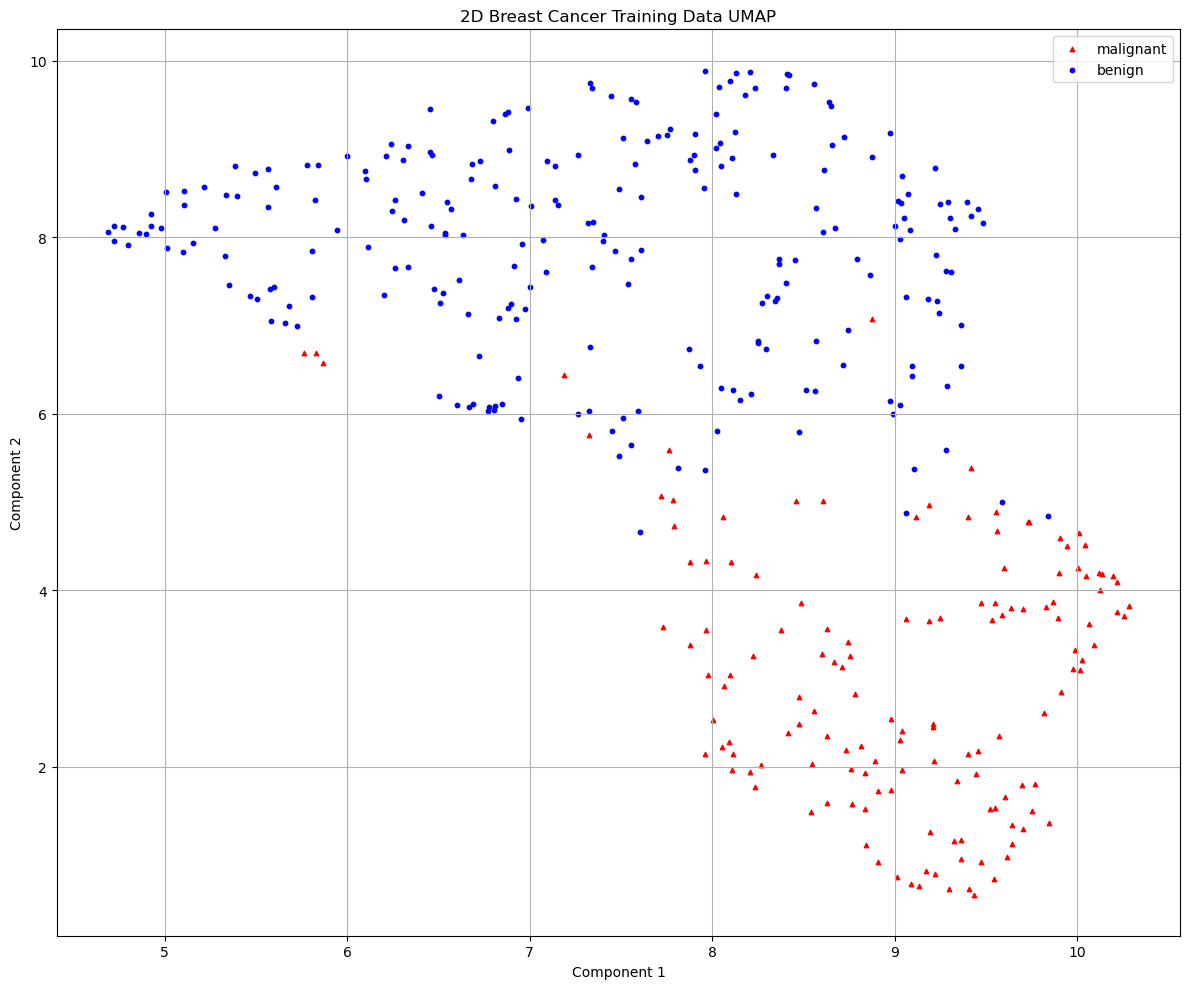

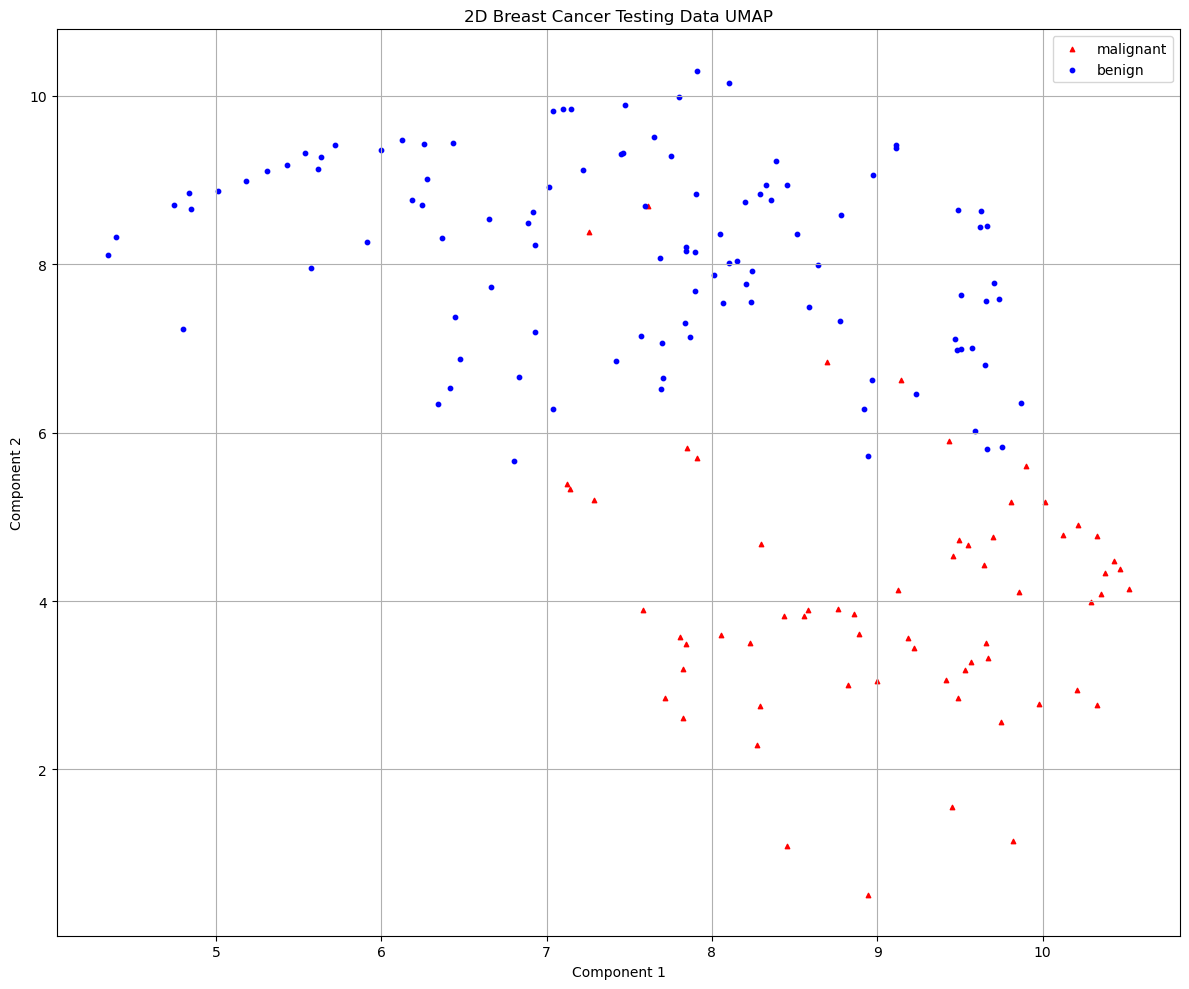

[I 2025-04-27 02:46:52,751] A new study created in memory with name: no-name-17dd0726-7ea6-4382-a1d8-739272ae6d65
[I 2025-04-27 02:46:52,911] Trial 0 finished with value: 0.9710526315789474 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 43, 'p': 1}. Best is trial 0 with value: 0.9710526315789474.
[I 2025-04-27 02:46:53,068] Trial 1 finished with value: 0.968421052631579 and parameters: {'n_neighbors': 28, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 45, 'p': 2}. Best is trial 0 with value: 0.9710526315789474.
[I 2025-04-27 02:46:53,225] Trial 2 finished with value: 0.9710526315789474 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 18, 'p': 1}. Best is trial 0 with value: 0.9710526315789474.
[I 2025-04-27 02:46:53,380] Trial 3 finished with value: 0.9710526315789473 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 45, 'p': 1}. Best 

Best trial:
Accuracy: 0.9789473684210528
Best hyperparameters:  {'n_neighbors': 12, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 13, 'p': 1}


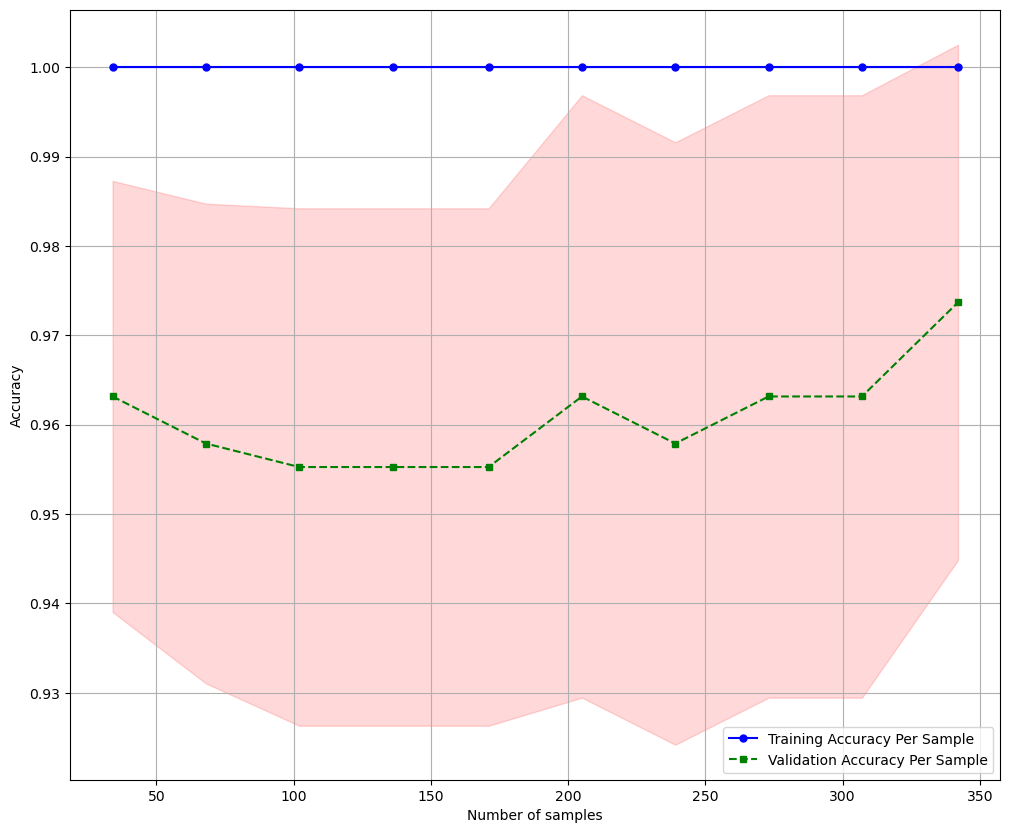

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC:0.9756


In [3]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)